# **Agricultura e Agroindústria: Maximizando Recursos e Estratégias**

## 1. Introdução

### 1.1. Contextualização

A indústria agrícola e agroindustrial tem passado por transformações significativas devido à necessidade de otimização de recursos e maximização da produção. Com o avanço da tecnologia e a disponibilidade de grandes conjuntos de dados, surge a oportunidade de utilizar métodos de KDD para descobrir padrões e insights cruciais para a tomada de decisões estratégicas.

### 1.2. Objetivo

O objetivo principal da pesquisa se apoia no método KDD (_Knowledge Discovery in Databases_) para analisar dados relacionados à produção agroindustrial. Ao realizar tal ato, buscamos:

- Identificar deficiências de produção em diferentes produtos agrícolas;

- Desenvolver modelos de previsão de safras baseados em dados históricos;

- Buscar oportunidades de mercado, como demandas crescentes por certos produtos;

- Estimar a demanda futura com base em tendências de mercado e sazonalidade, auxiliando no planejamento de produção e distribuição;


### 1.3. Metodologia

Como mensionado na sessão [Objetivo](#objetivo), a utilização do método KDD será crucial para o desenvolvimento organizado e estruturado da pesquisa. O termo KDD foi formalizado em 1989 em referência ao amplo conceito de procurar conhecimento a partir de bases de dados. Segundo pesquisadores: 
>“KDD é um processo, de várias etapas, não trivial, interativo e iterativo, para identificação de padrões compreensíveis, válidos, novos e potencialmente úteis a partir de grandes conjuntos de dados”. (Fayyad et al.,
1996a)

A Descoberta de Conhecimento em Bases de Dados é caracterizada como
um processo composto por várias etapas operacionais:  
A etapa de Pré-processamento, Mineração de Dados e o Pós-processamento.  

Além do método, utilizaremos a linguagem de programação python e suas seguintes bibliotecas: Pandas para a manipulação dos dados e Matplotlib para uma visualização simples e objetiva por meio de graficos e tabelas. 

Bases de dados utilizadas:
  - IBGE -> SIDRA - [PAM (Produção Agrícola Municipal)](https://sidra.ibge.gov.br/pesquisa/pam/tabelas)   

## 2. Etapas operacionais

### 2.1. Pré-processamento

A etapa de Pré-processamento compreende todas as funções relacionadas à captação, à organização e ao tratamento dos dados. Essa etapa tem como objetivo a preparação dos dados para os algoritmos da etapa da Mineração de Dados.  

Para começarmos o tratamento dos dados, é importante primeiro importar as bibliotecas que serão utilizadas.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
from IPython.display import Image as IPImage, display
%matplotlib inline

Aqui vamos carregar os dados sobre os produtos de origem vegetal

In [12]:
base_dados = ['Base De Dados/Produtos de Origem Vegetal/Quantidade Produzida_2022.xlsx',
              'Base De Dados/Produtos de Origem Vegetal/Quantidade Produzida_2021.xlsx',
              'Base De Dados/Produtos de Origem Vegetal/Quantidade Produzida_2020.xlsx']

print('Dados de Produção Vegetal')

for arquivo in base_dados:
    df = pd.read_excel(arquivo)
    print(df)
    print()

Dados de Produção Vegetal
                       Produtos   Quantidade
0  Algodão Herbáceo (em caroço)    6.422.030
1              Arroz (em casca)   10.776.268
2                Café (em grão)    3.172.562
3              Feijão (em grão)    2.842.395
4                       Laranja   16.929.631
5                      Mandioca   17.648.564
6               Milho (em grão)  109.420.717
7                Soja (em grão)  120.701.031
8               Trigo (em grão)   10.343.182

                       Produtos   Quantidade
0  Algodão Herbáceo (em caroço)    5.711.692
1              Arroz (em casca)   11.660.605
2                Café (em grão)    2.985.581
3              Feijão (em grão)   2.900.805.
4                       Laranja   16.217.839
5                      Mandioca   18.220.656
6               Milho (em grão)   88.272.116
7                Soja (em grão)  134.799.179
8               Trigo (em grão)    7.878.413

                       Produtos   Quantidade
0  Algodão Herbáceo (em car

Aqui vamos carregar os dados sobre os produtos de origem animal

In [13]:
base_animal = {
    'Base De Dados/Produtos de Origem Animal/Quantidade Produzida_2022.xlsx',
    'Base De Dados/Produtos de Origem Animal/Quantidade Produzida_2021.xlsx',
    'Base De Dados/Produtos de Origem Animal/Quantidade Produzida_2020.xlsx'
    }


print('Dados de Produção Animal')

for arquivo in base_animal:
    df_animal = pd.read_excel(arquivo)
    print(df_animal)
    print()

Dados de Produção Animal
                   Produtos  Quantidade
0                     Leite  35.183.066
1           Ovos de Galinha   4.821.802
2           Ovos de Codorna     272.213
3             Mel de Abelha  55.678.534
4  Casulos do bicho-da-seda   2.211.145
5                        Lã   8.298.591

                   Produtos  Quantidade
0                     Leite  34.609.218
1           Ovos de Galinha   4.886.564
2           Ovos de Codorna     229.194
3             Mel de Abelha  60.966.305
4  Casulos do bicho-da-seda   1.806.675
5                        Lã   8.884.395

                   Produtos  Quantidade
0                     Leite  35.316.667
1           Ovos de Galinha   4.767.022
2           Ovos de Codorna      293.48
3             Mel de Abelha  52.493.135
4  Casulos do bicho-da-seda   2.742.372
5                        Lã   7.983.862



Com base nos dados carregadas podemos começar a trabalhar na mineração e analise de forma visual, gerando os graficos em cima dos dados. 

### 2.2. Mineração de dados

Durante a etapa de Mineração de Dados é realizada a busca efetiva por conhecimentos úteis no contexto da aplicação de KDD. É a principal etapa do processo de KDD. Envolve a aplicação de algoritmos sobre os dados em busca de conhecimento implícitos e úteis.

É relevante notar que nossa abordagem não incluirá técnicas de Inteligência Artificial, como _Lógica Nebulosa (Fuzzy Logic), Algoritmos Genéticos (AG), redes neurais_, entre outras metodologias mencionadas na literatura utilizada como referência. Nossas análises serão estritamente baseadas em lógica, visando precisão e fornecimento de resultados pertinentes.

##### 2.2.1. Identificar deficiências de produção em diferentes produtos agrícolas;

Para iniciar, utilizamos o banco de dados do IBGE e o Power BI como ferramentas para análise de dados, criando gráficos e tratando tabelas. Em seguida, procedemos à análise dos dados, visualizando a deficiência na produção agrícola em cada um dos estados

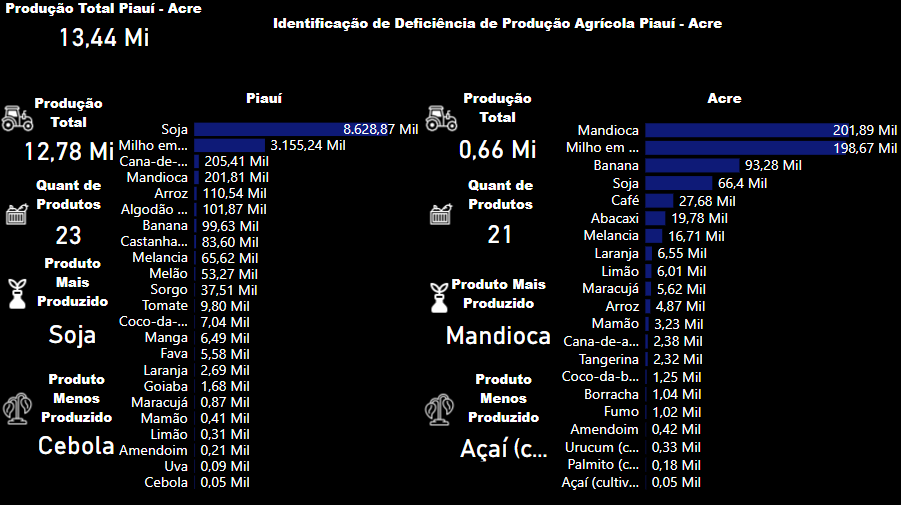

In [14]:
display(IPImage(filename='Base De Dados/Produção.png'))


##### 2.2.2. Buscar oportunidades de mercado, como demandas crescentes por certos produtos;

In [15]:
base_dados = {
    'Grafico de 2022': 'Base De Dados/Produtos de Origem Vegetal/Quantidade Produzida_2022.xlsx',
    'Grafico de 2021': 'Base De Dados/Produtos de Origem Vegetal/Quantidade Produzida_2021.xlsx',
    'Grafico de 2020': 'Base De Dados/Produtos de Origem Vegetal/Quantidade Produzida_2020.xlsx'
}

def load_data(file_path):
    df = pd.read_excel(file_path)
    df['Quantidade'] = df['Quantidade'].str.replace('.', '').astype(float)
    return df


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Produção de Produtos'),
    dcc.Dropdown(
        id='dropdown',
        options=[{'label': key, 'value': value} for key, value in base_dados.items()],
        value=list(base_dados.values())[0]
    ),
    dcc.Graph(id='pie-chart')
])

@app.callback(
    Output('pie-chart', 'figure'),
    [Input('dropdown', 'value')]
)
def update_pie_chart(file_path):
    df = load_data(file_path)
    fig = px.pie(df, values='Quantidade', names='Produtos', title='Produção de Produtos Vegetal')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

Com base no gráfico mostrado, podemos observar uma grande demanda por produtos como soja e milho, resultando em um consequente crescimento na sua produção. Essa demanda crescente abre várias portas de oportunidades tanto no mercado interno quanto no externo.

No caso da soja, temos produtos derivados como óleo de soja e carne, enquanto o milho é fundamental na produção de ração animal e biocombustível. Além disso, há um potencial significativo para investimentos em tecnologias que possam aumentar a eficiência e sustentabilidade das lavouras.

Com base nos dados obtidos podemos observar um 


In [16]:
base_animal = {
    'Grafico de 2022': 'Base De Dados/Produtos de Origem Animal/Quantidade Produzida_2022.xlsx',
    'Grafico de 2021': 'Base De Dados/Produtos de Origem Animal/Quantidade Produzida_2021.xlsx',
    'Grafico de 2020': 'Base De Dados/Produtos de Origem Animal/Quantidade Produzida_2020.xlsx'
}

def load_data(file_path):
    df_animal = pd.read_excel(file_path)
    df_animal['Quantidade'] = df_animal['Quantidade'].str.replace('.', '').astype(float)
    return df_animal


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Produção de Produtos'),
    dcc.Dropdown(
        id='dropdown',
        options=[{'label': key, 'value': value} for key, value in base_animal.items()],
        value=list(base_animal.values())[0]
    ),
    dcc.Graph(id='bar-chart')
])

@app.callback(
    Output('bar-chart', 'figure'),
    [Input('dropdown', 'value')]
)
def update_bar_chart(file_path):
    df_animal = load_data(file_path)
    fig_animal = px.bar(df_animal, x='Produtos', y='Quantidade', color='Produtos', title='Produção de Produtos Animal')
    return fig_animal

if __name__ == '__main__':
    app.run_server(debug=True, port=8052)


Leite, ovos de galinha e mel possuem uma demanda muito grande devido aos seus diversos ramos de produção. O leite, por exemplo, é a base para produtos como queijos, iogurtes e manteiga. O mel de abelha é altamente valorizado em produtos naturais e orgânicos, além de subprodutos como própolis e cera de abelha, que têm aplicações na indústria farmacêutica e cosmética. Os ovos de galinha são consumidos diariamente e utilizados como ingrediente em muitos outros produtos. Esse crescimento na produção desses itens é impulsionado pelas oportunidades de venda e pela eficiência. 

##### 2.2.3. Desenvolver modelos de previsão de safras baseados em dados históricos;


Desenvolver sessão aqui!

##### 2.2.4. Estimar a demanda futura com base em tendências de mercado e sazonalidade, auxiliando no planejamento de produção e distribuição;

Para darmos inicio, utilizaremos o dataframe da variável `Prod` criada e tratada na sessão de [Pré-processamento](#21-pré-processamento). Podemos analisar a quantidade produzida entre 2020 a 2022 de diversos produtos listados na base de dados.

### 2.3. Pós-processamento